In [1]:
import numpy as np
import matplotlib.pyplot as plt


import os
import cv2


In [3]:
DATADIR = "/home/raj/anaconda3/PetImages"

CATEGORIES = ["Dog","Cat"]

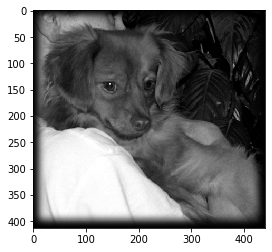

In [6]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)# path to cats or dogs directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [7]:
print(img_array)

[[1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [2 1 2 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(img_array.shape)

(413, 440)


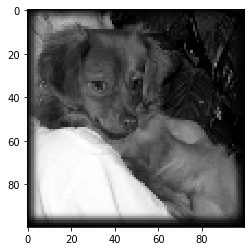

In [27]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [38]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        
        class_num = CATEGORIES.index(category)
         
        path = os.path.join(DATADIR,category)# path to cats or dogs directory
        for img in os.listdir(path):
            try:   
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            
                training_data.append([new_array,class_num])
            except Exception as e:
                pass


            
create_training_data()
            
            
            
    

In [41]:
print(len(training_data))

24946


In [42]:
import random

random.shuffle(training_data)

In [45]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
1
0
1
0
1
0


In [46]:
x =[]
y =[]

In [48]:
for feature,label in training_data:
    x.append(feature)
    y.append(label)
    
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [49]:
import pickle
pickle_out = open("X_data","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out = open("Y_data","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [51]:
pickle_in = open("Y_data","rb")
y=pickle.load(pickle_in)
print(y[1])


0
